In [63]:
import zipfile
import urllib.request
import os

year = 2010
data_path = '\\Users\\jesus\\Desktop\\143_ECE\\Final_Project\\recursive_predictions\\ozone_data2\\'
for i in range(11):
    pass
    url = 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_'+str(year)+'.zip'
    print(url)
    urllib.request.urlretrieve(url, data_path+'ozone_data'+str(year)+'.zip')
    with zipfile.ZipFile(data_path+'ozone_data'+str(year)+'.zip', 'r') as zip_ref:
        zip_ref.extractall(data_path+str(year)+'_data')
    
    os.remove(data_path+'ozone_data'+str(year)+'.zip') 

    year +=1

https://aqs.epa.gov/aqsweb/airdata/daily_44201_2010.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2011.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2012.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2013.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2014.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2015.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2016.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2017.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2018.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2019.zip
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2020.zip


In [1]:
import csv
def convine_data_files():
    data_path = '\\Users\\jesus\\Desktop\\143_ECE\\Final_Project\\recursive_predictions\\ozone_data2\\'
    year = 2010
    lines = []
    for i in range(11):
        with open(data_path+str(year)+'_data'+'\\daily_44201_'+str(year)+'.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for line in list(reader):
                lines.append(line)
        year += 1
    return lines

In [3]:
ozone_data = convine_data_files()

In [4]:
import matplotlib.pyplot as plt
from datetime import timezone
from datetime import datetime
import numpy as np
import itertools

class city_regression:
    def __init__(self, data, city_name):
        self.city_name = city_name
        self.data = []
        self.data_float = []
        added_dates = []
        for ind_measurment in data:
            if(city_name in ind_measurment):
                temp = [datetime.strptime(ind_measurment[11],"%Y-%m-%d"),float(ind_measurment[16])]
                if(str(datetime.strptime(ind_measurment[11],"%Y-%m-%d")) not in added_dates):
                    added_dates.append(str(datetime.strptime(ind_measurment[11],"%Y-%m-%d")))
                    self.data.append(temp)
                    self.data_float.append([datetime.strptime(ind_measurment[11],"%Y-%m-%d").timestamp(),float(ind_measurment[16])])
        print(len(self.data))

        #self.data_float[1] = np.convolve(self.data_float[1], np.ones(30), 'valid') / 7
        #self.data_float[1] = list(itertools.islice(self.data_float[1],0,len(self.data_float[1])-1,7))
        #x = list(itertools.islice(self.data_float[0],0,len(self.data_float[0])-1,7))        
    def __str__(self):
        return str(self.city_name)
    def print_graph(self):
        a = np.asarray(self.data)

        x, y = a.T
        y = np.convolve(y, np.ones(30), 'valid') / 7
        y = list(itertools.islice(y,0,len(y)-1,7))
        x = list(itertools.islice(x,0,len(x)-1,7))
        print(len(x[0:-4]), len(y))
        plt.plot(x[0:-4],y)
        plt.show()
        
        

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [20]:
county_sample =['Alameda','Butte','Contra Costa', 'Fresno','Humboldt', 'Imperial', 'Kern', 'Los Angeles', 'Marin', 'Monterey', 'Napa','Orange','Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Mateo', 'Santa Barbara', 'Solano', 'Sonoma', 'Stanislaus']
county_sample =['Alameda','Amador','Butte', 'Calaveras','Colusa', 'Contra Costa', 'El Dorado', 'Glenn', 'Humboldt', 'Imperial', 'Inyo','Kern', 'Kings', 'Lake', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Monterey', 'Napa','Nevada', 'Orange', 'Placer','Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama','Tulare', 'Tuolumne', 'Ventura', 'Yolo']
print(len(county_sample))

48


In [21]:
county_data = []
for i in county_sample:
    county_data.append(city_regression(ozone_data,i))
print(len(county_data))

3866
3847
3896
3837
3789
3866
3821
3707
3914
3743
3854
3865
3948
3926
3834
3864
3852
3859
3428
3798
3834
3855
3956
3923
3865
3926
3865
3896
3896
3865
3856
3846
3834
3843
3896
3866
3817
3895
3593
3926
3882
3926
3858
3755
3896
3799
3926
3918
48


522
261


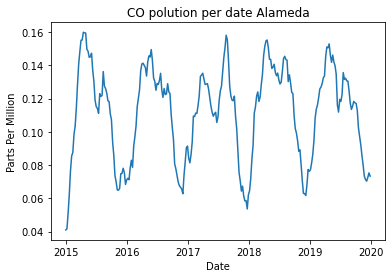

25 25
520
260


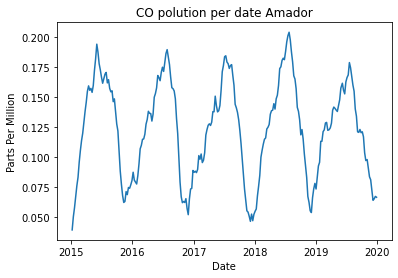

25 25
522
261


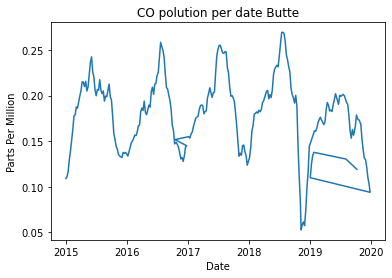

30 30
518
260


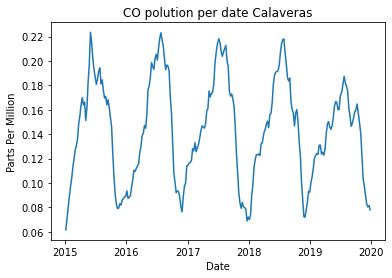

25 25
511
258


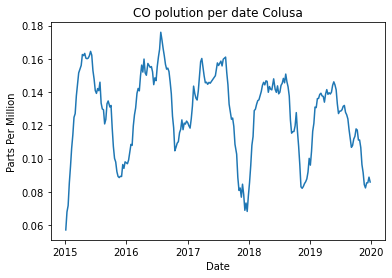

25 25
522
261


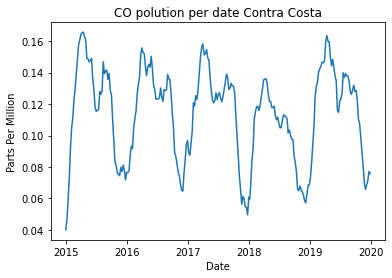

25 25
516
260


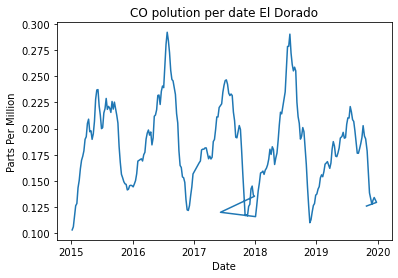

25 25
500
258


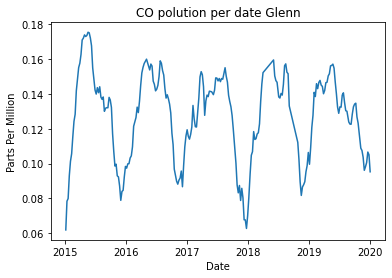

25 25
521
261


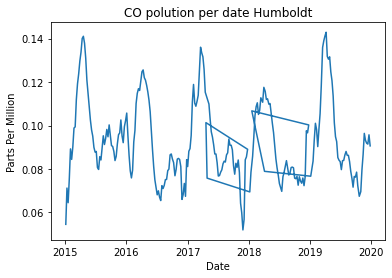

33 33
522
261


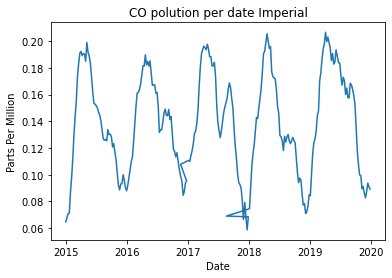

8 8
516
255


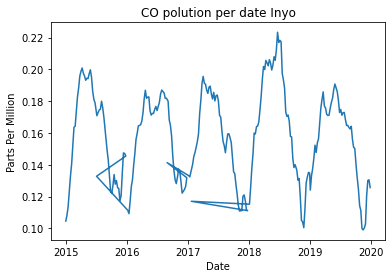

30 30
522
261


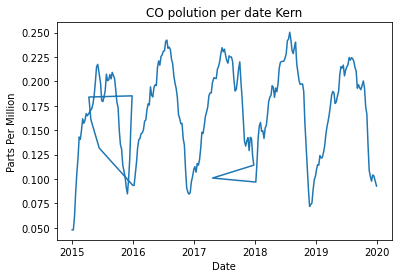

25 25
521
260


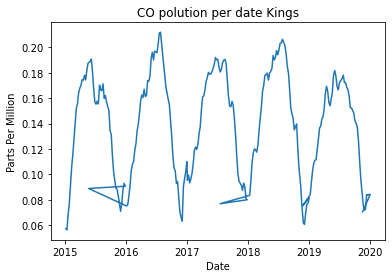

38 38
522
261


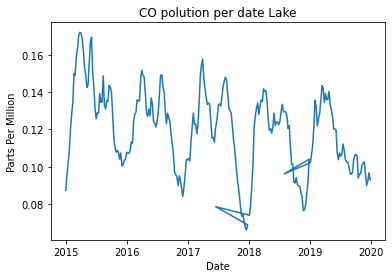

34 34
522
261


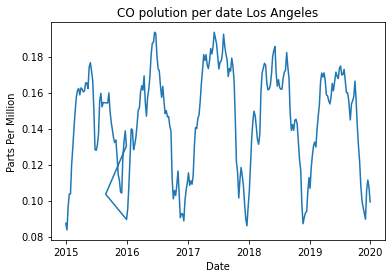

21 21
522
261


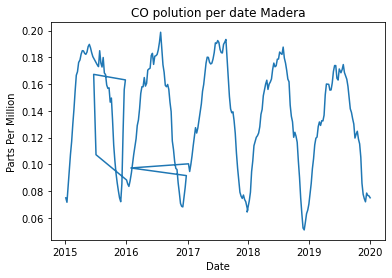

25 25
520
261


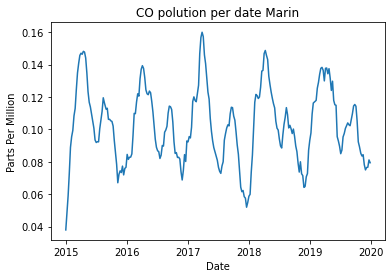

25 25
517
260


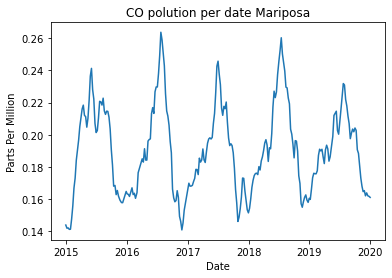

29 29
477
222


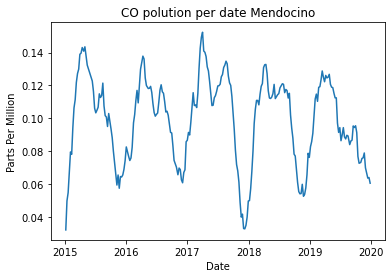

8 8
504
246


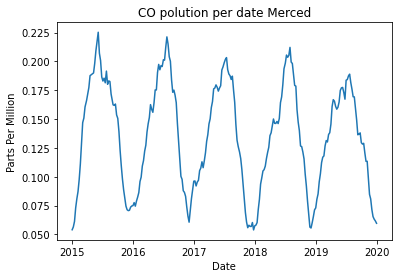

34 34
522
261


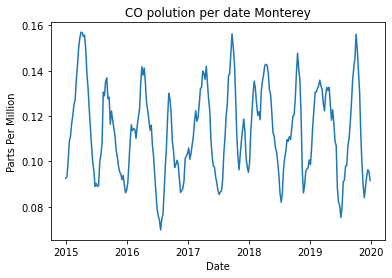

21 21
521
261


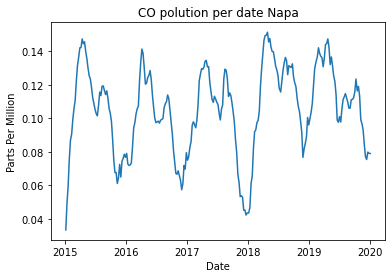

25 25
522
261


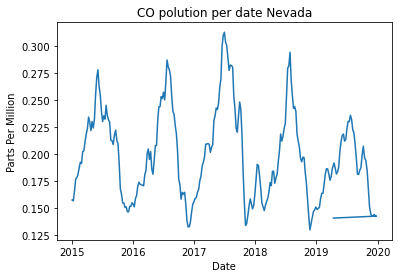

38 38
522
261


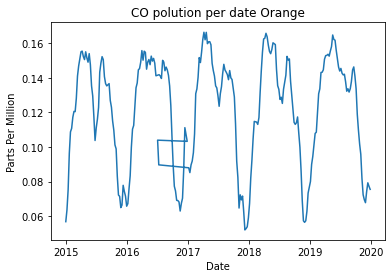

34 34
522
261


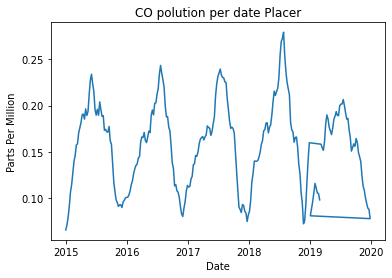

25 25
522
261


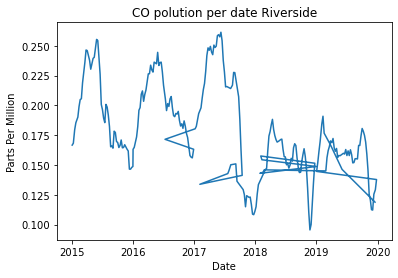

34 34
522
261


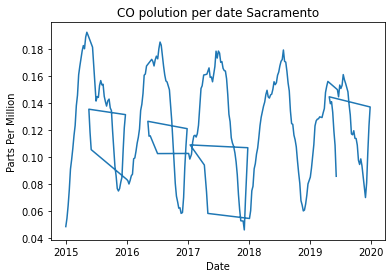

25 25
522
261


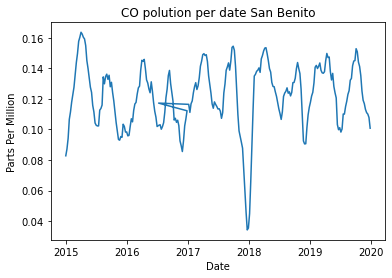

30 30
522
261


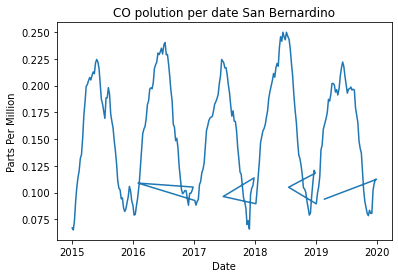

30 30
522
261


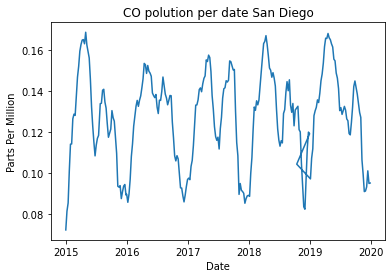

25 25
521
261


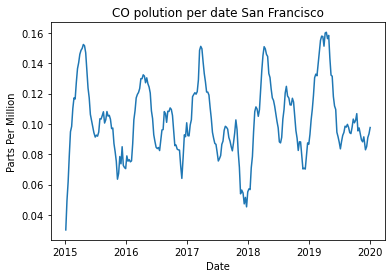

25 25
519
259


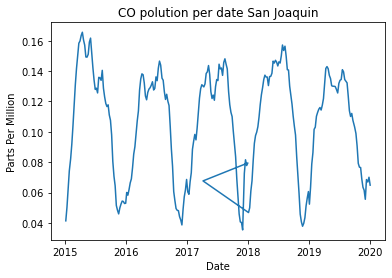

26 26
522
261


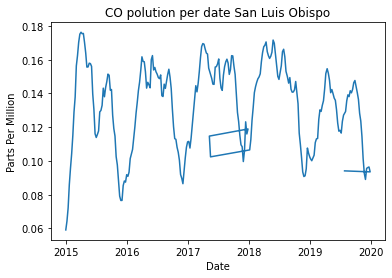

21 21
519
259


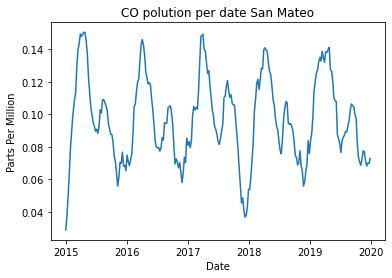

25 25
522
261


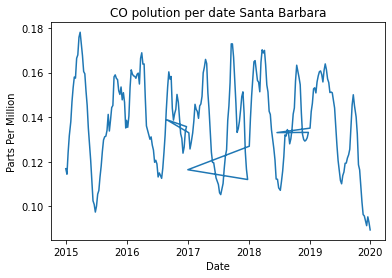

30 30
522
296


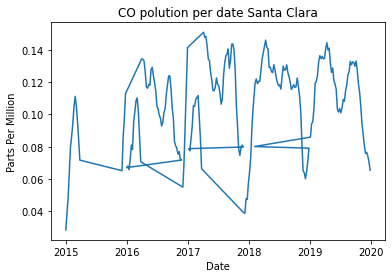

25 25
520
260


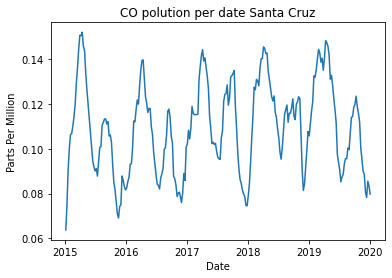

20 20
522
261


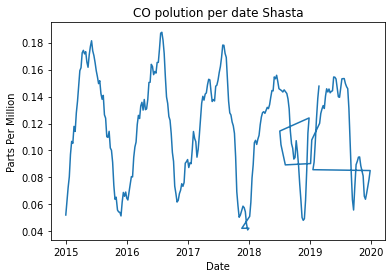

30 30
488
259


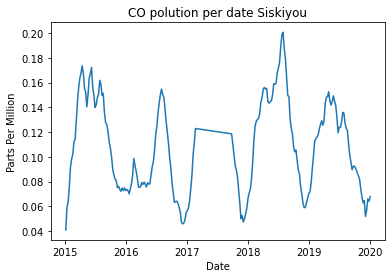

20 20
522
261


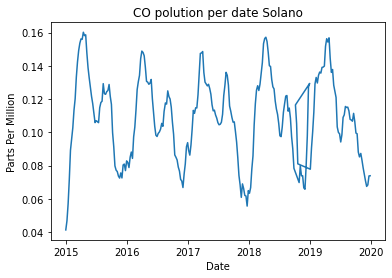

34 34
520
261


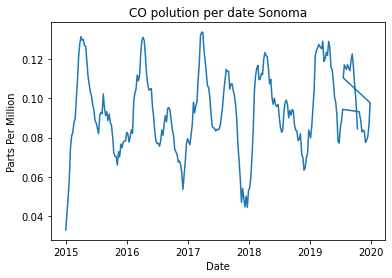

30 30
522
261


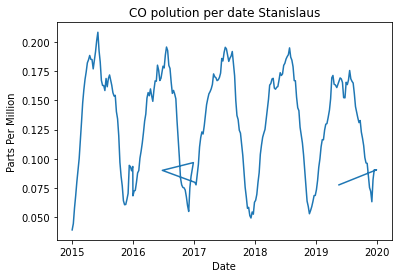

34 34
521
261


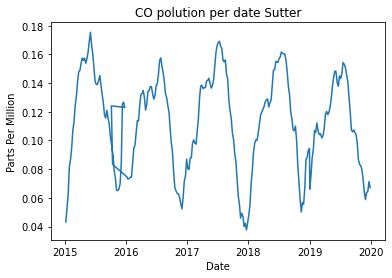

25 25
523
286


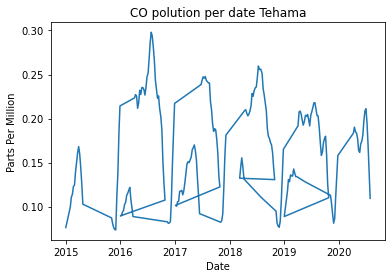

9 9
544
291


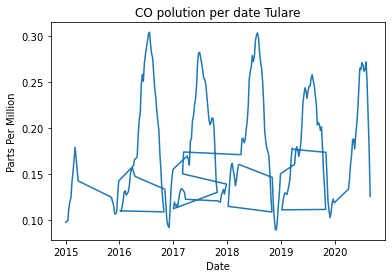

8 8
514
256


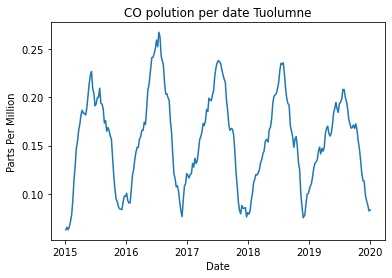

24 24
522
261


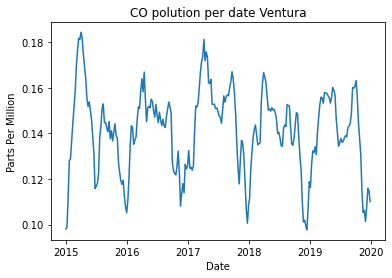

34 34
522
261


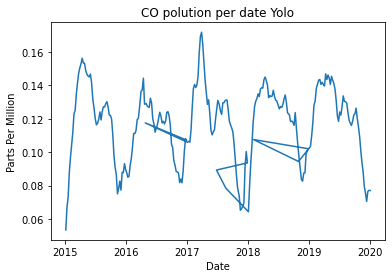

33 33


In [22]:
train_data_convined = []
test_data = []
test_dates = []
k = 0
for i in county_data:
    a = np.asarray(i.data)
    #print(len(a))
    x, y = a.T
    #print(len(x), len(y))
    y = np.convolve(y, np.ones(30), 'valid') / 7
    y = list(itertools.islice(y,0,len(y)-1,7))
    x = list(itertools.islice(x,0,len(x)-1,7))
    minDate = 1
    maxDate = 1
    #print(len(x), len(y))
    while True:
        try:
            print(x.index(datetime(2020,1,minDate)))
            break
        except:
            minDate = minDate +1
    while True:
        try:
            print(x.index(datetime(2015,1,maxDate)))
            break
        except:
            maxDate = maxDate +1
            
    trainData = (x[x.index(datetime(2015,1,maxDate)):x.index(datetime(2020,1,minDate))],y[x.index(datetime(2015,1,maxDate)):x.index(datetime(2020,1,minDate))])
    
    #print(len(trainData[0]), len(trainData[1]))
    #print(trainData[0][-1],trainData[0][-2])

    plt.plot(trainData[0],trainData[1])
    plt.xlabel('Date')
    plt.ylabel('Parts Per Million')
    plt.title('CO polution per date '+county_sample[k])
    plt.show()
    train_data_convined.append(trainData)
    test_data.append(y[x.index(datetime(2020,1,minDate))+1:])
    test_dates.append(x[-len(test_data[-1]):])
    print(len(test_data[-1]), len(test_dates[-1]))
    k = k + 1

In [ ]:
predictions = []
print(len(train_data_convined))
k = 0
for i in train_data_convined:
    my_order = (0,1,0)
    my_seasonal_order = (1, 0, 1, 52.143)
    # define model
    model = SARIMAX(i[1], order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    predictions.append(model_fit.forecast(len(test_dates[k])))
    k = k +1

48


C:\Users\Jesus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jesus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jesus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jesus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jesus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

In [ ]:
predictions_with_date = []
k = 0
for i in predictions:
    minDate = 1
    plt.plot(test_dates[k],i)
    plt.xlabel('Date')
    plt.ylabel('Parts Per Million')
    plt.title('CO polution prediction ' + county_sample[k])
    plt.show()
    k = k + 1

In [ ]:
print(len(test_data), len(predictions))
k = 0
for i in test_data:
    plt.plot(test_dates[k],i)
    plt.xlabel('Date')
    plt.ylabel('Parts Per Million')
    plt.title('CO polution date ' + county_sample[k])
    plt.show()
    k = k + 1

In [ ]:
residuals = []
for i in range(len(test_data)):
    residuals.append(test_data[i] - predictions[i])
    plt.figure(figsize=(10,4))
    plt.plot(test_dates[i],residuals[i])
    plt.axhline(0, linestyle='--', color='k')
    plt.title('Residuals from SARIMA Model ' + county_sample[i], fontsize=20)
    plt.ylabel('Difference vs Expected', fontsize=16)